In [1]:
import sys
!{sys.executable} -m pip install --upgrade git+https://github.com/AndersBjelland/IT3105_Project2.git@dev

  Cloning https://github.com/AndersBjelland/IT3105_Project2.git (to revision dev) to /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-req-build-s5cv9bca
  Created wheel for Project2: filename=Project2-1.0-py3-none-any.whl size=14953 sha256=5e13453c5dbe26f594f07e36df72b20b893ab32b59ca00c39c703285589132a0
  Stored in directory: /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-ephem-wheel-cache-ppbz0ass/wheels/b2/24/99/8fa89aec957ae3920f431ef10ca7ed9e2e3743c4e806a2fbf0
Successfully built Project2
  Attempting uninstall: Project2
    Found existing installation: Project2 1.0
    Uninstalling Project2-1.0:
      Successfully uninstalled Project2-1.0


In [1]:
# our code
from src import *

alpha zero ran 800 simulations in mcts

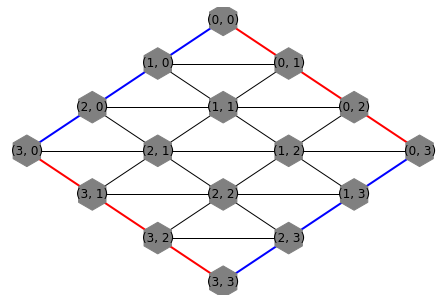

In [2]:
%matplotlib inline
hex = Hex((4,4))
hex.display_board()

In [3]:
encoder.create_padded_env(hex, padding=2).display_board()

AttributeError: module 'src.encoder' has no attribute 'create_padded_env'

In [7]:
hex = Hex((4,4))
encoder = HexEncoder(padding=2)

actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(90,50,16),
             filters=(128, 128, 64),
             kernel_sizes=((4,4),(3,3),(1,1)),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
              
            
                

In [7]:
#mcts = MCTS(target_policy=actor)
agent = Agent(actor)

In [ ]:
agent.train_agent(hex, n_episodes=6, n_simulations=100, epochs=10, M=2)

  0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
from tensorflow import keras as KER 
actor1 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/second_ex_model_50.h5'
             )
actor2 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/second_ex_model_200.h5'
             )

agent1 = Agent(actor1)
agent2 = Agent(actor2)

In [13]:
def play(agent1, agent2, env):
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            action = agent1.actor.get_action(env)
            
        else:
            action = agent2.actor.get_action(env)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner

In [14]:
blue_winner = 0
red_winner = 0
for i in range(100):
    winner = play(agent1, agent2, hex)
    if winner == 1:
        blue_winner += 1
    elif winner == 2:
        red_winner += 1
print("blue winner: {}".format(blue_winner))
print("red winner: {}".format(red_winner))

blue winner: 0
red winner: 100


In [4]:
def onclick(event, board):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    ix, iy = rotate_coordinate([ix,iy], -board.get_angle())
    ix, iy = round(ix), round(iy)
    action = (ix, iy)
    actions.append(action)
    board.make_action(action)
    board.display_board()
    fig.canvas.mpl_disconnect(connection)

def set_piece(board) -> List[Tuple[int, int]]:
    board = board.copy()
    global actions, connection, fig
    actions = []
    fig = plt.figure()
    connection = fig.canvas.mpl_connect('button_press_event', lambda event: onclick(event, board))
    
    board.display_board()
    
    plt.show()
    return actions

In [91]:
%matplotlib qt
action = set_piece(Hex((5,5)))


In [92]:
action

[(3, 1)]

In [19]:
%matplotlib qt
def man_vs_machine(player1, player2, env, n_simulations):
    current = player1
    if isinstance(player1, Agent):
        mcts = MCTS(player1.actor, env)
    else:
        mcts = MCTS(player2, env)
    
    while env.get_winner() == 0:
        env.display_board()
        if isinstance(current, Agent):
            distribution = mcts.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts.set_new_root(action)
            
        else:
            #actions = set_piece(env)
            action = input("Enter move as int,int")
            action = action.split(',')
            action = (int(action[0]), int(action[1]))
            #action = actions[0]
            #plt.show()
            mcts.set_new_root(action)
            
        env.make_action(action)
        current = player1 if current != player1 else player2
    winner = env.get_winner()
    env.display_board()
    env.reset()
    return winner

hex = Hex((4,4))
man_vs_machine(agent1, "meg", hex, n_simulations=100)



KeyboardInterrupt: Interrupted by user

In [29]:
x = input("skirv:")

skirv:3,3


In [30]:

y = x.split(',')
(int(y[0]),int(y[1]))

(3, 3)

In [6]:
from tensorflow import keras as KER 
actor1 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor1.model = KER.models.load_model('model1.h5')

actor2 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor2.model = KER.models.load_model('model2.h5')


agent1 = Agent(actor1)
agent2 = Agent(actor2)

def play(agent1, agent2, env, n_simulations):
    mcts1 = MCTS(actor1, env)
    mcts2 = MCTS(actor2, env)
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            distribution = mcts1.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts1.set_new_root(action)
            mcts2.set_new_root(action)
            
        else:
            
            distribution = mcts2.search(n_simulations)
            
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts2.set_new_root(action)
            mcts1.set_new_root(action)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner
    

OSError: SavedModel file does not exist at: model1.h5/{saved_model.pbtxt|saved_model.pb}

In [11]:
blue_vic = 0
vics = []
for i in range(20):
    print(i)
    vic = play(agent1, agent2, hex, 100)
    if vic == 1:
        blue_vic += 1
    vics.append(vic)
blue_vic

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


11

In [9]:
mcts = MCTS(env = hex, target_policy=agent2.actor)

In [14]:

%time mcts.search(100)

CPU times: user 4.33 s, sys: 112 ms, total: 4.44 s
Wall time: 4.23 s


{(1, 0): 0.023333333333333334,
 (0, 1): 0.060000000000000005,
 (0, 0): 0.04666666666666667,
 (3, 0): 0.16666666666666669,
 (2, 3): 0.09000000000000001,
 (0, 3): 0.006666666666666667,
 (2, 2): 0.006666666666666667,
 (2, 0): 0.07666666666666667,
 (3, 2): 0.08,
 (1, 3): 0.006666666666666667,
 (3, 3): 0.006666666666666667,
 (0, 2): 0.043333333333333335,
 (1, 1): 0.023333333333333334,
 (2, 1): 0.3066666666666667,
 (3, 1): 0.04,
 (1, 2): 0.016666666666666666}

In [58]:
data = np.asarray(Image.open(path))

In [59]:
data.shape

(575, 1024, 3)

In [53]:
import cProfile


In [69]:
encoder = SimpleHexEncoder(padding=0)

In [70]:
h = Hex((4,4))

In [71]:
actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(64, 16),
             filters=(56,56),
             kernel_sizes=((3,3),(1,1)),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
agent = Agent(actor=actor)

In [72]:
encoder.encode(h).shape

TensorShape([1, 4, 4, 5])

In [73]:
mcts = MCTS(agent.actor, h)

In [74]:
%time mcts.search(100)

CPU times: user 2.12 s, sys: 11.1 ms, total: 2.13 s
Wall time: 2.18 s


{(1, 0): 0.22,
 (2, 0): 0.07,
 (0, 3): 0.01,
 (1, 3): 0.05,
 (1, 2): 0.1,
 (0, 1): 0.01,
 (2, 1): 0.09,
 (3, 1): 0.04,
 (2, 3): 0.05,
 (3, 2): 0.11,
 (0, 2): 0.01,
 (1, 1): 0.13,
 (0, 0): 0.04,
 (3, 0): 0.01,
 (3, 3): 0.03,
 (2, 2): 0.03}

In [54]:
cProfile.run('mcts.search(100)')

         9201361 function calls (9183676 primitive calls) in 7.931 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1965    0.003    0.000    0.019    0.000 <__array_function__ internals>:2(concatenate)
    11790    0.011    0.000    0.143    0.000 <__array_function__ internals>:2(expand_dims)
        1    0.000    0.000    7.986    7.986 <string>:1(<module>)
    11790    0.005    0.000    0.011    0.000 _asarray.py:86(asanyarray)
    78600    0.027    0.000    0.061    0.000 abc.py:96(__instancecheck__)
     5895    0.011    0.000    0.137    0.000 activations.py:268(relu)
     1965    0.008    0.000    0.109    0.000 activations.py:44(softmax)
     1965    0.043    0.000    7.597    0.004 actor.py:59(get_action)
     1965    0.017    0.000    0.017    0.000 actor.py:68(<dictcomp>)
    11790    0.020    0.000    0.020    0.000 autocast_variable.py:526(__init__)
    11790    0.012    0.000    0.017    0.000 autocast_var